# 📊 Capstone Project Module 2

## 🎯 Project Objectives

Tujuan dari Capstone Project Module 2 ini adalah untuk mendapatkan insight dan analisa dari dataset untuk membuat rekomendasi actionable yang bisa di lakukan oleh supermarket untuk meningkatkan penjualan.

## Data Dictionary

### People
 - ID:Customer's unique identifier
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Recency: Number of days since customer's last purchase
 - Complain: 1 if the customer complained in the last 2 years, 0 otherwise
### Products
 - MntWines: Amount spent on wine in last 2 years
 - MntFruits: Amount spent on fruits in last 2 years
 - MntMeatProducts: Amount spent on meat in last 2 years
 - MntFishProducts: Amount spent on fish in last 2 years
 - MntSweetProducts: Amount spent on sweets in last 2 years
 - MntGoldProds: Amount spent on gold in last 2 years
### Promotion
 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
### Place
 - NumWebPurchases: Number of purchases made through the company’s website
 - NumCatalogPurchases: Number of purchases made using a catalog
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to the company’s website in the last month

## Problem Statement

Dari Data Dictionary di atas, ada beberapa pertanyaan yang bisa di ajukan untuk tujuan analisa. Diantaranya:

- Apakah Income atau penghasilan tahunan sebuah rumah tangga atau keluarga berpengaruh terhadap pembelian?
- Apakah campaign atau acara promosi yang diberikan Supermarket berhasil untuk mendorong pembelian? jika iya, promosi yang mana yang efektif?
- Bagaimanakah cara customer berbelanja? Apakah dengan adanya website atau laman supermarket, pembelian bisa di-insentifkan?

# Library Loading

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

# Data Loading

In [174]:
df = pd.read_csv("Supermarket Customers.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Disini terlihat bahwa data sudah di-load dengan baik.

## Data Understanding

In [175]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dari hasil .info() di atas, terlihat bahwa rata-rata, setiap column memiliki 2240 row, kecuali column *Income* yang hanya memiliki 2216 row, menunjukkan adanya Missing value.

In [176]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Dengan menggunakan .describe(), kita bisa mendapatkan informasi detail tentang column yang bersifat numerical, termasuk mean dan median, quartil, serta standard deviation. Ini berguna untuk kita memilih data yang akan diproses untuk analisis nantinya.

In [177]:
df.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Bisa dilihat dari hasil .isnull() yang dihitung menggunakan .sum(), column *Income* memiliki 24 row data yang missing. 

In [178]:
df.duplicated().sum()

np.int64(0)

Dilakukan juga pengecekan untuk data-data duplikat, untuk menghindari hasil analisis yang tidak tepat. Hasil .duplicated() yang di hitung dengan sum() menunjukkan tidak ada data yang ter-duplikasi.

In [179]:
df[df['ID'].duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Dilakukan double check untuk melihat apakah ada data duplikasi di kolom ID, yang seharusnya unik bagi setiap user.

# Data Pre-processing

## Data Cleaning

Dengan jumlah missing data yang relatif sedikit (~1%) di column *Income* dan data type-nya float64, maka bisa di bersihkan dengan membuang row yang missing data *income* nya.

Langkah ini diambil sebagai alternatif dari mengganti missing value dengan data *mean* atau *median* dari data *income* yang memiliki variance yang besar, sehingga ada kemungkinan tidak akuratnya representasi dari *mean* atau *median* income dari para User.

In [180]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

Bisa dilihat juga dari .info() bahwa column *education*, *Marital_status* dan *Dt_Customer* adalah data bertipe object, menunjukkan bahwa column-column tersebut memiliki data non-numerical atau non angka, sehingga perlu dilakukan pengecekan untuk data noise.

In [181]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())



--- Education ---
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

--- Marital_Status ---
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

--- Dt_Customer ---
Dt_Customer
31-08-2012    12
12-05-2014    11
14-02-2013    11
12-09-2012    11
22-05-2014    10
              ..
01-11-2013     1
10-08-2013     1
11-10-2012     1
20-12-2012     1
09-01-2014     1
Name: count, Length: 662, dtype: int64


C:\Users\mbaga\AppData\Local\Temp\ipykernel_24036\1287862426.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_status_check.index, y=marital_status_check.values, palette='viridis')


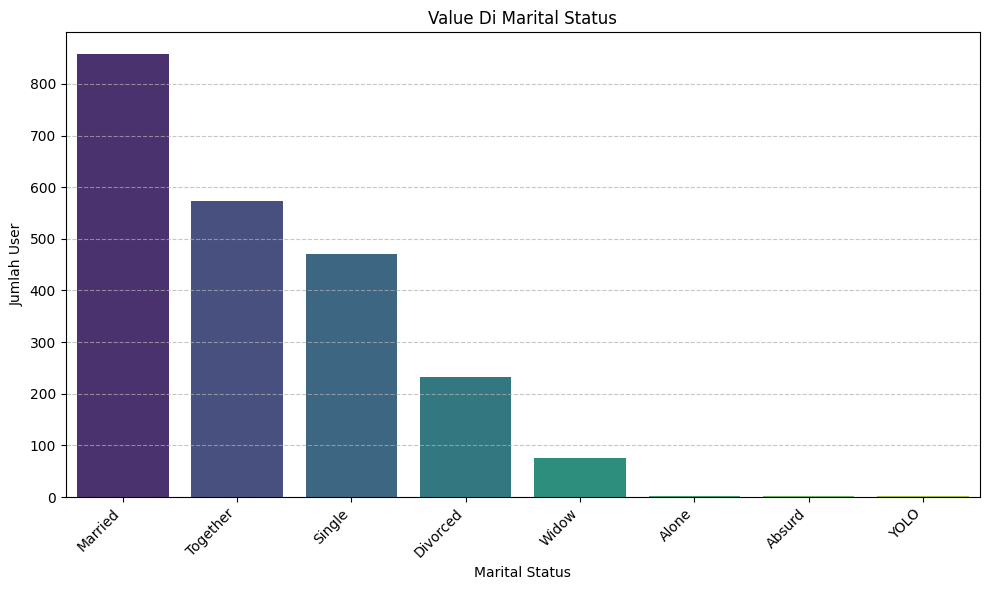

In [182]:
plt.figure(figsize=(10, 6))
marital_status_check = df['Marital_Status'].value_counts()

# Create a bar plot
sns.barplot(x=marital_status_check.index, y=marital_status_check.values, palette='viridis')
plt.title('Value Di Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Jumlah User')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 Dari hasil diatas, bisa dilihat value atau data-data unik di setiap column yang data type-nya adalah "Object". Bisa dilihat bahwa ada beberapa data noise di *Marital Status*. Dikarenakan jumlahnya yang sangat sedikit, maka diputuskan untuk melakukan drop atau pembuangan data noise tersebut.
 


In [183]:
Noise_marital = ['Absurd', 'Alone', 'YOLO']
df = df[~df['Marital_Status'].isin(Noise_marital)]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2209 non-null   int64  
 1   Year_Birth           2209 non-null   int64  
 2   Education            2209 non-null   object 
 3   Marital_Status       2209 non-null   object 
 4   Income               2209 non-null   float64
 5   Kidhome              2209 non-null   int64  
 6   Teenhome             2209 non-null   int64  
 7   Dt_Customer          2209 non-null   object 
 8   Recency              2209 non-null   int64  
 9   MntWines             2209 non-null   int64  
 10  MntFruits            2209 non-null   int64  
 11  MntMeatProducts      2209 non-null   int64  
 12  MntFishProducts      2209 non-null   int64  
 13  MntSweetProducts     2209 non-null   int64  
 14  MntGoldProds         2209 non-null   int64  
 15  NumDealsPurchases    2209 non-null   int64 

Dari hasil .info() diatas, terlihat bahwa jumlah row sudah berkurang menjadi 2209, artinya 7 row sudah di drop, yang juga merupakan jumlah data noise yang terdeteksi.

Kita juga bisa melihat, bahwa value di column Marital_Status bisa di simplifikasi karena kemiripan status dari beberapa value, seperti *Married* dan *Together* memiliki nilai yang sama di dalam konteks user supermarket, karena mereka memiliki pasangan, sedangkan *single* tidak memiliki pasangan, dan *Widowed* serta *Divorced* pernah memiliki pasangan.

In [184]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'In Relationship',
    'Together': 'In Relationship',
    'Divorced': 'Previously Married',
    'Widow': 'Previously Married'
})

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,In Relationship,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,In Relationship,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,In Relationship,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [185]:
df['Marital_Status'].unique()


array(['Single', 'In Relationship', 'Previously Married'], dtype=object)

Dari hasil .head() dan .unique() bisa dilihat bahwa value unik di column marital_status telah berhasil di simplifikasikan menjadi *In Relationship*, *Single* dan *Previously Married*

In [186]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2209 non-null   int64         
 1   Year_Birth           2209 non-null   int64         
 2   Education            2209 non-null   object        
 3   Marital_Status       2209 non-null   object        
 4   Income               2209 non-null   float64       
 5   Kidhome              2209 non-null   int64         
 6   Teenhome             2209 non-null   int64         
 7   Dt_Customer          2209 non-null   datetime64[ns]
 8   Recency              2209 non-null   int64         
 9   MntWines             2209 non-null   int64         
 10  MntFruits            2209 non-null   int64         
 11  MntMeatProducts      2209 non-null   int64         
 12  MntFishProducts      2209 non-null   int64         
 13  MntSweetProducts     2209 non-null   i

Dt_Customer juga merupakan column yang salah data typenya, sehingga sebaiknya diganti ke data type Datetime sehingga lebih tepat merepresentasikan Tanggal. Format tanggal DD-MM-YYYY dipilih sesuai dengan data yang bisa dilihat di dataset.

## Outlier

Dari .describe() di bagian Data Understanding, bisa dilihat bahwa standard deviation dari berbagai macam data numerical bisa terbilang tinggi, yaitu dimana nilai std dari column tersebut lebih besar dari nilai rata-rata atau *mean*.

Column yang bisa di deteksi memiliki nilai std yang besar adalah income atau penghasilan dari User, dan column produk supermarket

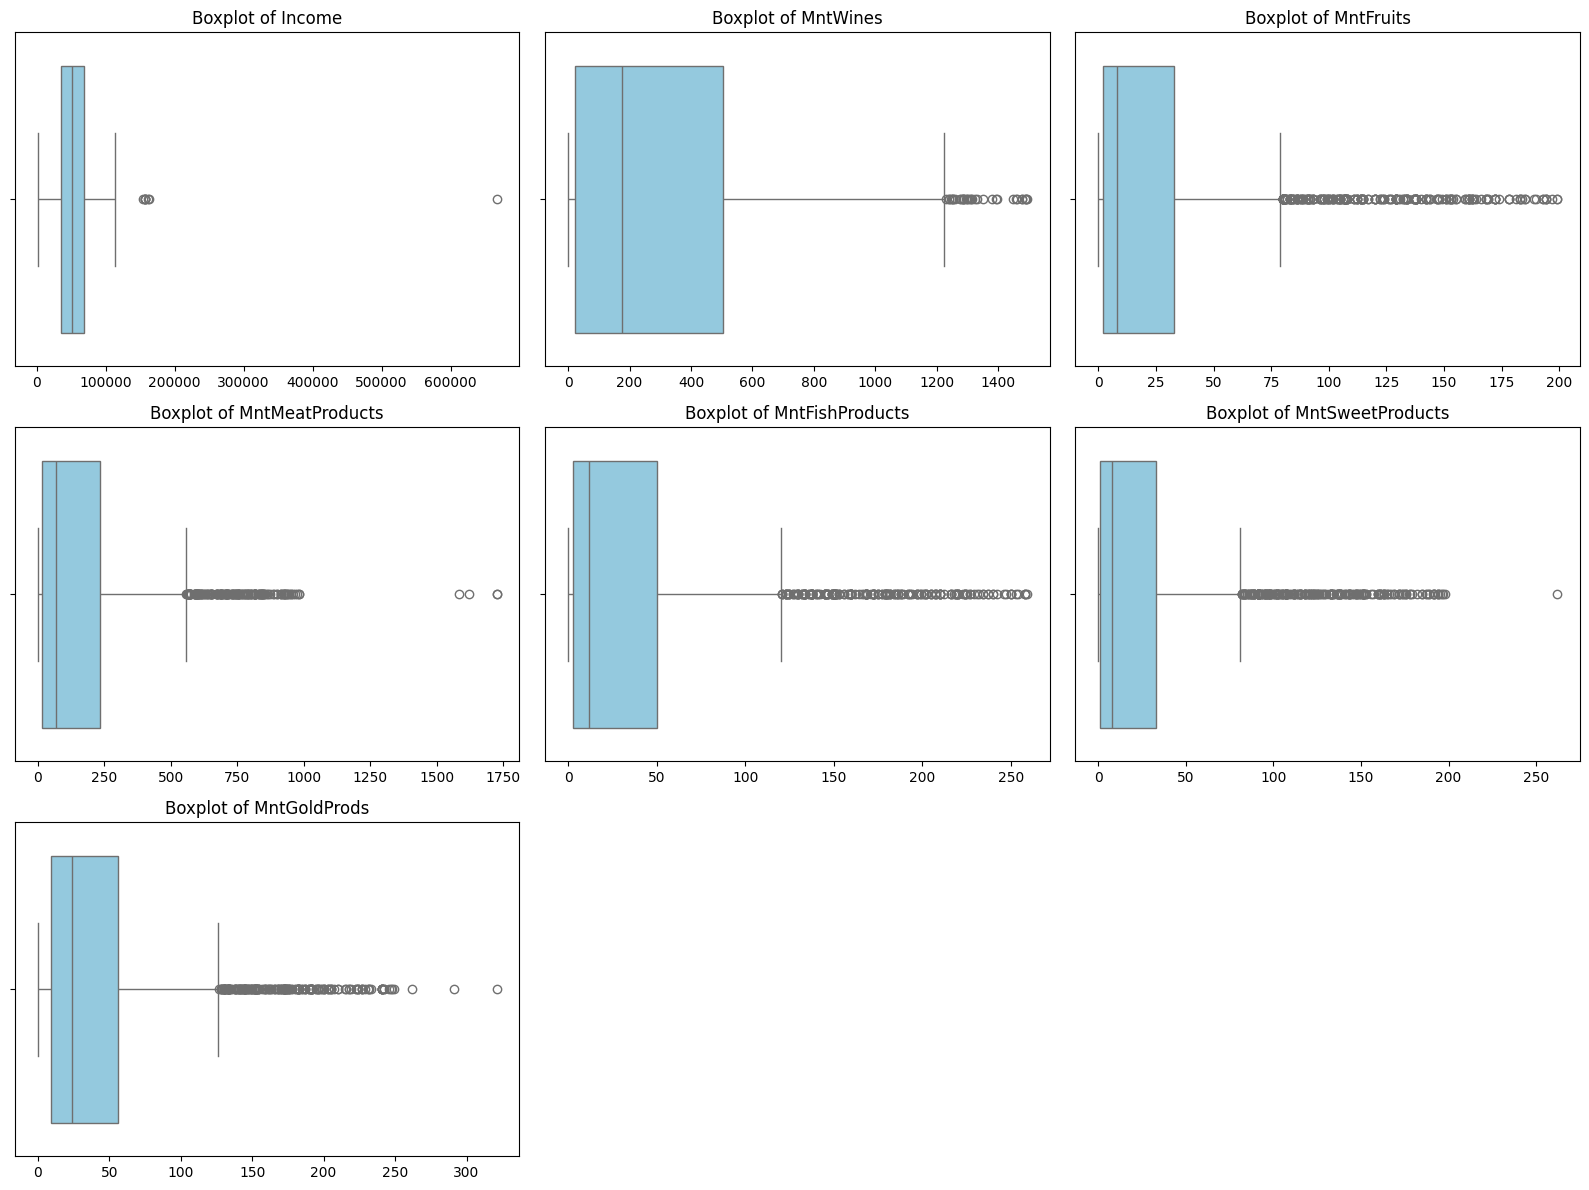

In [187]:
# Columns to visualize
Column_outlier = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Set up the figure
plt.figure(figsize=(16, 12))

# Loop through columns
for i, col in enumerate(Column_outlier, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Hasil visualization dengan boxplot diatas menunjukkan bahwa data dari column-column tersebut, sesuai dengan nilai std mereka yaitu sangat besar berbanding nila rata-rata atau *mean*, dan nilai datanya right skewed atau banyak outlier di nilai tertingginya.

In [188]:
# Cap outliers
for col in Column_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR


    # Cap the values
    df[col] = df[col].clip(lower, upper)

Disini, metode *Capping* atau menggunakan Interquartil dari data tersebut untuk membatasi outlier atas dan bawah ke nilai quartil 3 dan quartil 1, agar outlier bisa di normalisasikan.

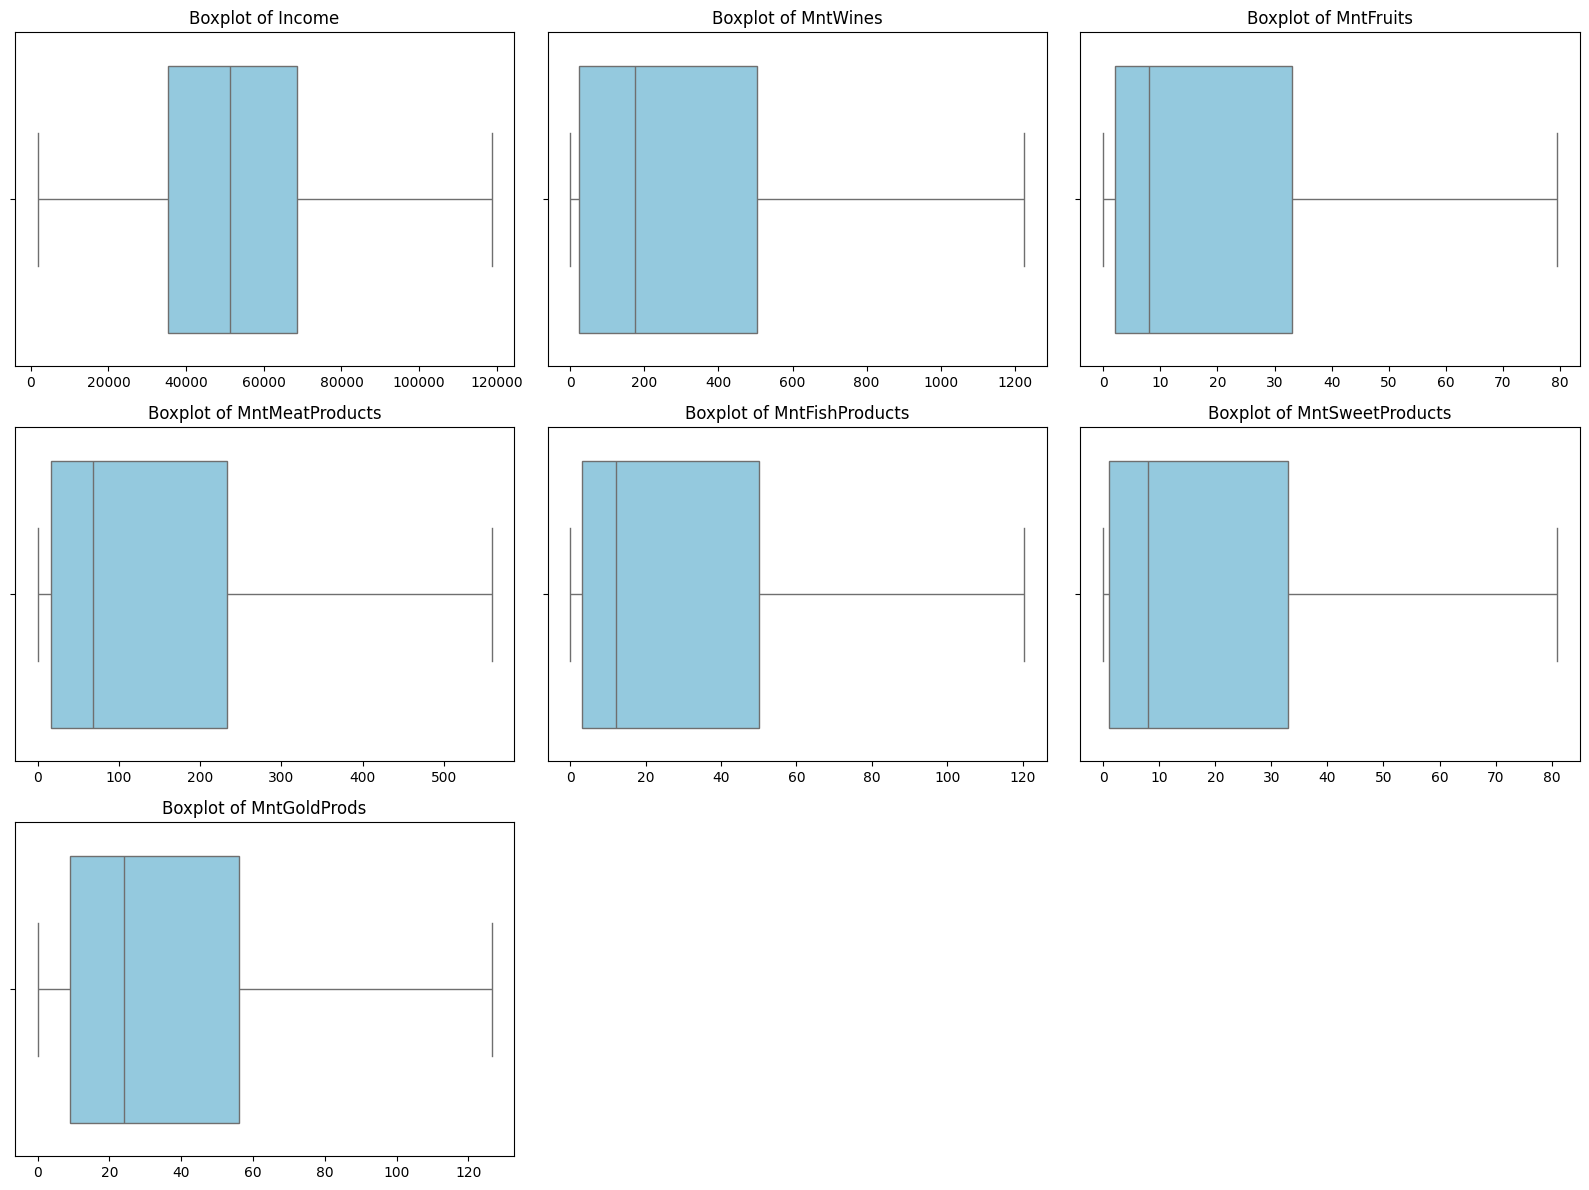

In [189]:
# Columns to visualize
Column_outlier = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Set up the figure
plt.figure(figsize=(16, 12))

# Loop through columns
for i, col in enumerate(Column_outlier, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Bisa dilihat, setelah membatasi dengan IQR, boxplot menunjukkan distribusi right skewed tanpa adanya outlier.

# Exploratory Data Analysis

Untuk melakukan EDA, kita akan kembali ke problem statement di awal.

#### 1. Apakah Income atau penghasilan tahunan sebuah rumah tangga atau keluarga berpengaruh terhadap pembelian?

Untuk menjawab pertanyaan ini, diperlukan column baru bernama TotalSpent, yaitu untuk menghitung, seberapa banyak pembelanjaan atau pembelian sebuah rumah tangga atau keluarga dalam kurun dua tahun terakhir. Column ini akan menggabungkan semua pembelanjaan produk supermarket seperti MntFruits, MntBeef, dan yang lainnya.

In [193]:
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                 df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,79.5,546.0,120.5,81,88.0,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1550.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,1.0,6.0,2.0,1,6.0,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27.0
2,4141,1965,Graduation,In Relationship,71613.0,0,0,2013-08-21,26,426.0,49.0,127.0,111.0,21,42.0,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776.0
3,6182,1984,Graduation,In Relationship,26646.0,1,0,2014-02-10,26,11.0,4.0,20.0,10.0,3,5.0,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53.0
4,5324,1981,PhD,In Relationship,58293.0,1,0,2014-01-19,94,173.0,43.0,118.0,46.0,27,15.0,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422.0


Bisa Dilihat bahwa TotalSpent telah berhasil ditambahkan ke dataset. Setelah ini, kita bisa mencari korelasi dari jumlah pembelanjaan dengan income dari suatu rumah tangga.

In [196]:
Correlation = df['Income'].corr(df['TotalSpent'])
print("Korelasi Penghasilan rumah tangga dengan Jumlah Pembelian: ",Correlation)




Korelasi Penghasilan rumah tangga dengan Jumlah Pembelian:  0.8054235213412351


hasil dari tes korelasi menunjukkan angka positif 0.805, menunjukkan adanya relasi positif yang kuat di antara kedua column. Kita bisa visualisasi kan menggunakan Scatterplot.

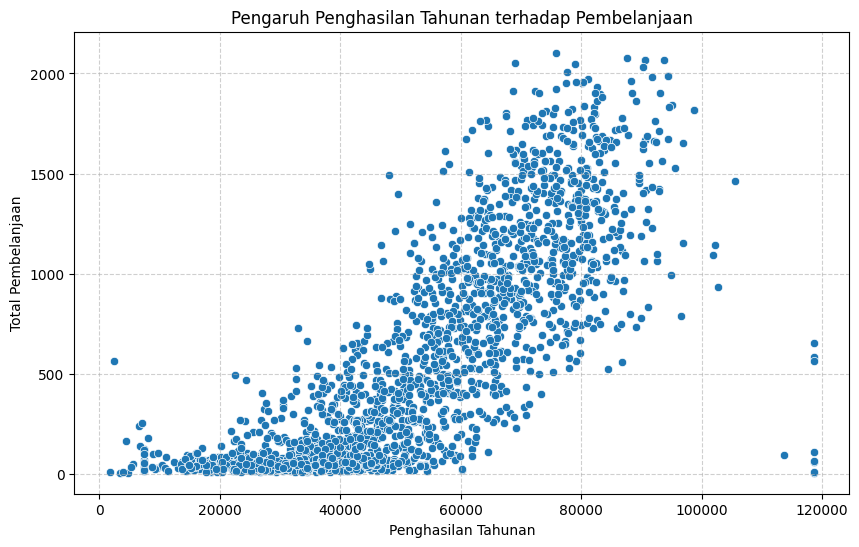

In [199]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Income', y='TotalSpent', data=df) 
plt.title('Pengaruh Penghasilan Tahunan terhadap Pembelanjaan') 
plt.xlabel('Penghasilan Tahunan')
plt.ylabel('Total Pembelanjaan') 
plt.grid(True, linestyle='--', alpha=0.6) 
plt.show() 

Dari scatterplot diatas, bisa disimpulkan bahwa secara garis besar, semakin tinggi penghasilan rumah tangga, maka semakin banyak pembelanjaan yang akan dikeluarkan secara total.

#### 2. Apakah campaign atau acara promosi yang diberikan Supermarket berhasil untuk mendorong pembelian? jika iya, promosi yang mana yang efektif?

Untuk menjawab pertanyaan ini, kita juga memerlukan column data baru yaitu dengan menggabungkan semua column campaign promosi, sehingga bisa kita dapatkan, dari semua User atau customer supermarket, berapa banyak yang menerima campaign tersebut? Ini dilakukan dengan mendapatkan rata-rata dari nilai 0 atau 1 yang didapat setiap campaign dari setiap customer.

In [ ]:
Campaign_List = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']


Campaign_Success = df[Campaign_List].mean() * 100
print("Persentase Kesuksesan Promo:\n", Campaign_Success)


Persentase Kesuksesan Promo:
 AcceptedCmp1     6.382979
AcceptedCmp2     1.358081
AcceptedCmp3     7.333635
AcceptedCmp4     7.424174
AcceptedCmp5     7.288366
Response        14.938886
dtype: float64


Dari hasil penghitungan menggunakan *mean* atau rata-rata, campaign promosi dari rentang promosi 1 sampai 6 atau 'Response', tingkat kesuksesan terbilang rendah dengan rata-rata sukses di 7.2% kesuksesan. Namun, 'Response' atau campaign ke 6 menerima kesuksesan terbanyak dengan 15%, dan campaign ke 2 bisa dibilang gagal dengan persentase jauh di bawah rata-rata, di nilai 1%.

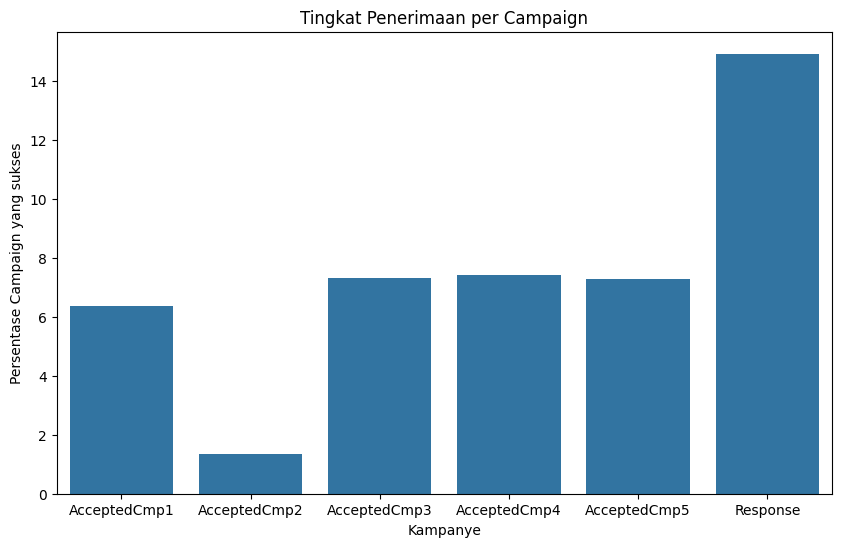

In [206]:
plt.figure(figsize=(10, 6))
sns.barplot(x=Campaign_Success.index, y=Campaign_Success.values)
plt.title('Tingkat Penerimaan per Campaign')
plt.xlabel('Kampanye')
plt.ylabel('Persentase Campaign yang sukses')
plt.show()

Bisa dilihat dengan lebih jelas bahwa 'Response' adalah campaign paling sukses, dan campaign 2 adalah campaign yang paling buruk. 

Bisa disimpulkan bahwa, secara rata-rata kualitas campaign masih harus ditingkatkan untuk mendapatkan kesuksesan yang besar, dan ini bisa di lakukan dengan mencontoh campaign 'Response' yang berhasil sukses lebih dari 2 kali lipat dibanding rata-rata di angka 15% pembelian dengan promo.

#### 3. Bagaimanakah cara customer berbelanja? Apakah dengan adanya website atau laman supermarket, pembelian bisa di-insentifkan?

Untuk menjawab pertanyaan ini, kita harus menghitung jumlah total pembelian dari setiap cara pembelian, yaitu dengan membeli langsung di toko (NumStorePurchases), Membeli melalui katalog toko (NumCatalogPurchases) dan Membeli melalui website atau laman web toko (NumWebPurchases)

In [ ]:
Purchase_Per_Channel = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

print("Jumlah Pembelian menggunakan methode:\n", Purchase_Per_Channel.sort_values(ascending=False))

Jumlah Pembelian menggunakan methode:
 NumStorePurchases      12818
NumWebPurchases         9017
NumCatalogPurchases     5900
dtype: int64


Setelah menghitung menggunakan .sum(), bisa dilihat bahwa membeli langsung di toko adalah cara pembelian terlaris, dengan 12818 pembelian, dan membeli melalui katalog adalah yang terbawah dengan 5900 pembelian, kurang dari setengah pembelian langsung di toko.

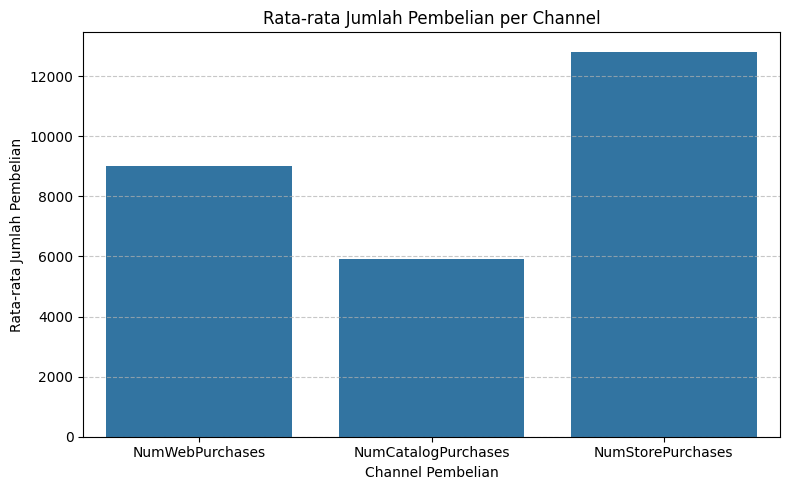

In [225]:
plt.figure(figsize=(8, 5))
sns.barplot(x=Purchase_Per_Channel.index, y=Purchase_Per_Channel.values)
plt.title('Rata-rata Jumlah Pembelian per Channel')
plt.xlabel('Channel Pembelian')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Bar plot di atas menunjukkan dengan lebih jelas bahwa membeli langsung di toko adalah cara paling disukai User untuk melakukan pembelian, dan membeli melalui katalog adalah yang terbawah.

Pertanyaan selanjutnya adalah, apakah laman web atau website dari supermarket termasuk sukses dalam menjadi channel pembelian?

In [220]:
Korelasi_web = df['NumWebVisitsMonth'].corr(df['NumWebPurchases'])
print("Korelasi antara pengunjung website dan pembeli website adalah: ",Korelasi_web)

Korelasi antara pengunjung website dan pembeli website adalah:  -0.05406515437792419


Dengan hasil korelasi negatif, menunjukkan bahwa pengunjung web cenderung tidak melakukan pembelian melalui website tersebut.

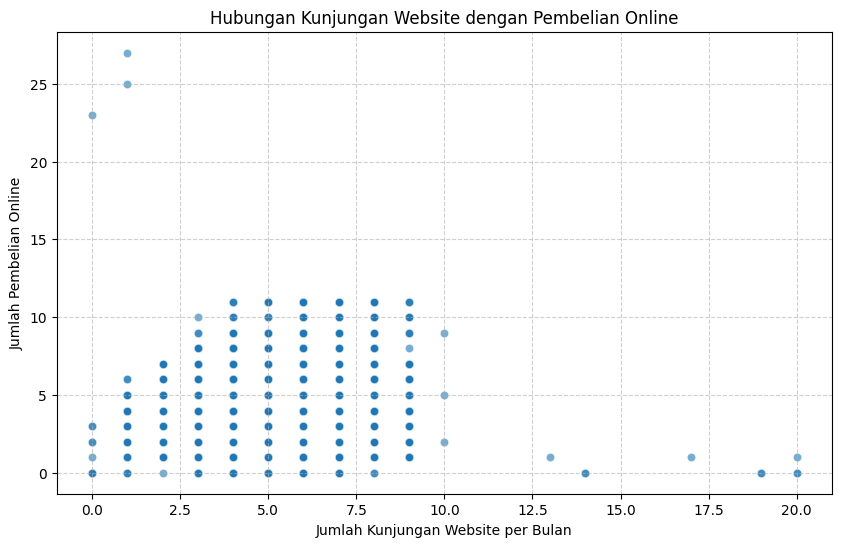

In [224]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df, alpha=0.6)
plt.title('Hubungan Kunjungan Website dengan Pembelian Online')
plt.xlabel('Jumlah Kunjungan Website per Bulan')
plt.ylabel('Jumlah Pembelian Online')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Di scatterplot ini, bisa dilihat adanya pattern atau pola yang tidak wajar di antara pengguna yang mengunjungi laman web dan pengguna yang melakukan pembelian. Rata-rata, pengunjung website yang melakukan antara 1 sampai 3.5 kunjungan mengikuti pola naik yang menunjukkan semakin sering mereka mengunjungi, semakin sering mereka membeli.

Namun setelah itu, pengunjung tidaklah lebih sering membeli bahkan sampai di 9 kunjungan per bulan. setelah itu, bahkan menunjukkan trend negatif dengan jarangnya pengguna yang menggunakan website lebih dari 9 kali setiap bulan.

In [231]:
total_web_purchases = df['NumWebPurchases'].sum()
total_web_visits = df['NumWebVisitsMonth'].sum()

print(f"Total Pembelian melalui Website: {total_web_purchases}")
print(f"Total Kunjungan Website: {total_web_visits}")

Total Pembelian melalui Website: 9017
Total Kunjungan Website: 11749


Dengan menghitung total pengunjung dengan total pembeli, bisa dilihat bahwa dari 11749 kunjungan, hanya 9017 kunjungan adalah untuk melakukan pembelian, dengan rasio pengunjung yang melakukan pembelian dengan total kunjungan sekitar 77%.

Kesimpulan disini adalah, Customer paling sering berbelanja lewat pembelian langsung di toko, dan paling jarang melewati katalog toko. Indikasi bahwa mengunjungi website dilakukan untuk melakukan pembelian juga negatif di -0.05, yang di konfirmasi oleh scatterplot dimana customer berhenti menunjukkan pembelian per kunjungan setelah hanya 3.5 kali berkunjung setiap bulan.

## 🎯 Kesimpulan


- Customer berbelanja sesuai dengan penghasilan tahunan dari rumah tangga mereka.
- Pembeli dengan jumlah di atas 2000 atau top spender adalah dari golongan Customer dengan penghasilan antara 60000 sampai 100000 per tahun.
- Untuk pembeli di bawah 500, rata-rata dari golongan dengan penghasilan 40000 ke bawah.
- Campaign Promosi supermarket secara rata-rata masih terbilang rendah dari tingkat kesuksesan menarik pembeli.
- Promosi paling bagus adalah promosi terakhir atau 'Response' dengan 15% pembeli yang tertarik, sedangkan yang terburuk adalah promosi 2 dengan hanya 1% pembelian.
- Metode berbelanja pilihan kebanyakan customer adalah dengan membeli langsung di toko (46%), mengalahkan website atau laman (32%) dan Katalog (21%).
- Laman Web atau website toko memiliki rasio pembelian dari total kunjungan di 77%, yang merupakan cukup baik.

### Rekomendasi Actionable

- Melakukan segmentasi User berdasarkan income (Low, Medium, High)
    - Low Income = 33% terbawah
    - Medium Income = 33% menengah
    - High income = 33% teratas
- Menargetkan peningkatan sales atau campaign promosi untuk kalangan Medium Income dan High income karena menghasilkan profit dan pembelian terbanyak.
    - Memberikan program loyalty card, untuk memberikan insentif tambahan untuk berbelanja.
    - Memberikan campaign dan program promo menargetkan barang-barang kualitas atas (High quality goods) seperti Emas, Beef, dan Wine.
- Menggunakan campaign terakhir atau 'Response' untuk meningkatkan kualitas campaign lainnya, karena memiliki tingkat kesuksesan tertinggi (15%) dibandingkan rata-rata (7%)
- Meningkatkan kualitas website dan promosi online, untuk menargetkan 23% yang berkunjung tanpa membeli.
    - Memberikan promosi atau campaign website only atau hanya bisa didapatkan melalui pembelian online
    - memberikan promosi yang bersifat time based atau hanya untuk sementara waktu, untuk memberikan kesan ekslusif.

